In [46]:
%load_ext autoreload
%autoreload 2

import os
import librosa
from preprocess import *
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from keras.utils import to_categorical

DATA_DIR = '/Users/king/Documents/Ein/语料/emodb/wav'
file_fp = os.path.join(DATA_DIR, '03a07La.wav')
wave, sr = librosa.load(file_fp, mono=True, sr=None)
print(wave.shape, sr)
wave = wave[::3]
mfcc = librosa.feature.mfcc(wave, sr=sr)
delta2_mfcc = librosa.feature.delta(mfcc, order=2)
print(mfcc.shape, delta2_mfcc.shape)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
(38425,) 16000
(20, 26) (20, 26)


/usr/local/Cellar/python/3.6.5/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/scipy/linalg/basic.py:1018: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  warnings.warn(mesg, RuntimeWarning)


(20, 26)
(20, 26)
(40, 26)


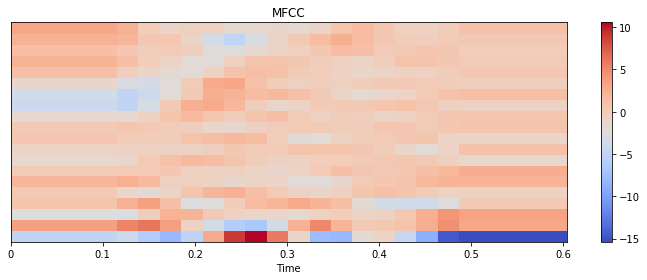

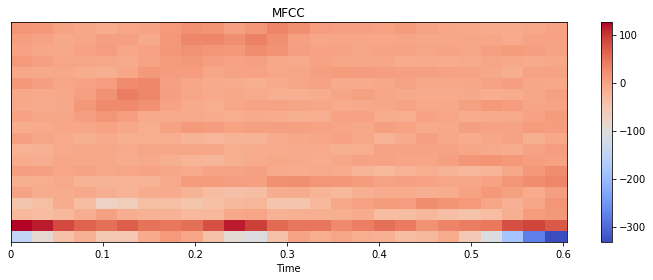

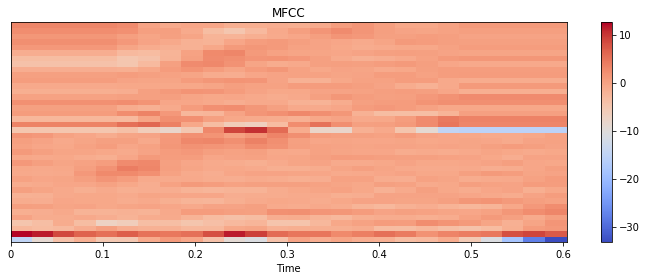

In [50]:
from model import print_sample
print_sample(delta2_mfcc)
print_sample(mfcc)
more_mfcc = np.vstack((mfcc/10, delta2_mfcc))
print_sample(more_mfcc)

In [58]:
from model import read_data_to_array
max_len = 21
X, y, label_to_int_dict = read_data_to_array(DATA_DIR, max_len, rescale=False)
print(X.shape, y.shape)

split_ratio = 0.8
random_state=42
#np.save(label + '.npy', mfcc_vectors)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= (1 - split_ratio), random_state=random_state, shuffle=True)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

[('anger', 127), ('boredom', 81), ('neutral', 79), ('happiness', 71), ('anxiety/fear', 69), ('sadness', 62), ('disgust', 46)]
(535, 20, 21) (535, 7)
(428, 20, 21) (428, 7)
(107, 20, 21) (107, 7)


In [59]:
# # Feature dimension
feature_dim_1 = X_train.shape[1]
feature_dim_2 = X_train.shape[2]
channel = X_train.shape[3] if len(X_train.shape) > 3 else 1

num_classes = y_train.shape[1]

# Reshaping to perform 2D convolution
if len(X_train.shape) == 3:
    X_train = X_train.reshape(X_train.shape[0], feature_dim_1, feature_dim_2, channel)
    X_test = X_test.reshape(X_test.shape[0], feature_dim_1, feature_dim_2, channel)

y_train_hot = y_train
y_test_hot = y_test
print(X_train.shape)
print(X_test.shape)

(428, 20, 21, 1)
(107, 20, 21, 1)


# Building The Model Then Training it

In [62]:
from model import create_model
model = create_model(num_classes, feature_dim_1, feature_dim_2, channel)

batch_size = 16
epochs = 150
verbose = 1
model.fit(X_train, y_train_hot, batch_size=batch_size, epochs=epochs, verbose=verbose, validation_data=(X_test, y_test_hot))


Train on 428 samples, validate on 107 samples
Epoch 1/150
428/428 [==============================] - 3s 7ms/step - loss: 3.4230 - acc: 0.2523 - val_loss: 1.7225 - val_acc: 0.3458
Epoch 2/150
428/428 [==============================] - 2s 4ms/step - loss: 1.6366 - acc: 0.3551 - val_loss: 1.5322 - val_acc: 0.4299
Epoch 3/150
428/428 [==============================] - 2s 4ms/step - loss: 1.4861 - acc: 0.4322 - val_loss: 1.4413 - val_acc: 0.4112
Epoch 4/150
428/428 [==============================] - 1s 3ms/step - loss: 1.3294 - acc: 0.5000 - val_loss: 1.3765 - val_acc: 0.4766
Epoch 5/150
428/428 [==============================] - 1s 3ms/step - loss: 1.2463 - acc: 0.5023 - val_loss: 1.1247 - val_acc: 0.5794
Epoch 6/150
428/428 [==============================] - 2s 4ms/step - loss: 1.1115 - acc: 0.6028 - val_loss: 1.1150 - val_acc: 0.5421
Epoch 7/150
428/428 [==============================] - 1s 3ms/step - loss: 1.0081 - acc: 0.6192 - val_loss: 1.1200 - val_acc: 0.6168
Epoch 8/150
428/428 [==

Epoch 62/150
428/428 [==============================] - 2s 4ms/step - loss: 0.0349 - acc: 0.9883 - val_loss: 2.2718 - val_acc: 0.6542
Epoch 63/150
428/428 [==============================] - 2s 4ms/step - loss: 0.0140 - acc: 0.9953 - val_loss: 2.5014 - val_acc: 0.6542
Epoch 64/150
428/428 [==============================] - 1s 3ms/step - loss: 0.0159 - acc: 0.9907 - val_loss: 1.9005 - val_acc: 0.7009
Epoch 65/150
428/428 [==============================] - 1s 3ms/step - loss: 0.0276 - acc: 0.9883 - val_loss: 2.2350 - val_acc: 0.6916
Epoch 66/150
428/428 [==============================] - 1s 3ms/step - loss: 0.0640 - acc: 0.9836 - val_loss: 2.2007 - val_acc: 0.6542
Epoch 67/150
428/428 [==============================] - 1s 3ms/step - loss: 0.0135 - acc: 0.9930 - val_loss: 2.0336 - val_acc: 0.6449
Epoch 68/150
428/428 [==============================] - 1s 3ms/step - loss: 0.0264 - acc: 0.9953 - val_loss: 2.2732 - val_acc: 0.6542
Epoch 69/150
428/428 [==============================] - 1s 3ms

Epoch 123/150
428/428 [==============================] - 1s 3ms/step - loss: 0.0103 - acc: 0.9977 - val_loss: 2.0174 - val_acc: 0.7290
Epoch 124/150
428/428 [==============================] - 1s 3ms/step - loss: 0.0094 - acc: 0.9977 - val_loss: 2.4310 - val_acc: 0.7009
Epoch 125/150
428/428 [==============================] - 1s 3ms/step - loss: 2.0158e-04 - acc: 1.0000 - val_loss: 2.3441 - val_acc: 0.7009
Epoch 126/150
428/428 [==============================] - 1s 3ms/step - loss: 3.8730e-04 - acc: 1.0000 - val_loss: 2.4581 - val_acc: 0.7290
Epoch 127/150
428/428 [==============================] - 2s 4ms/step - loss: 0.0124 - acc: 0.9977 - val_loss: 2.6512 - val_acc: 0.7103
Epoch 128/150
428/428 [==============================] - 1s 3ms/step - loss: 0.0126 - acc: 0.9977 - val_loss: 2.4590 - val_acc: 0.6636
Epoch 129/150
428/428 [==============================] - 2s 4ms/step - loss: 0.0036 - acc: 0.9977 - val_loss: 2.3374 - val_acc: 0.7009
Epoch 130/150
428/428 [========================

In [63]:
out_model_fp = os.path.join(os.path.dirname(DATA_DIR), 'model.h5')
print(out_model_fp)
model.save(out_model_fp)

/Users/king/Documents/Ein/语料/emodb/model.h5


In [64]:
from keras.models import load_model
model = load_model(out_model_fp)

## Prediction

In [69]:
from model import predict

labels = list(zip(*sorted(label_to_int_dict.items(), key=lambda x: x[1])))[0]
print(labels)
# audio_fp = os.path.join(DATA_DIR, '16b02Fd.wav')
audio_fp = '/Users/king/Downloads/新录音-12.wav'
sample = wav2mfcc(audio_fp, max_len)
print(predict(sample, model=model, labels=labels))

('anger', 'boredom', 'neutral', 'happiness', 'anxiety/fear', 'sadness', 'disgust')
labels: ('anger', 'boredom', 'neutral', 'happiness', 'anxiety/fear', 'sadness', 'disgust')
probs: [3.8490800e-14 2.3486147e-13 2.1637300e-11 5.7349212e-12 1.6648218e-11
 1.0000000e+00 4.5653650e-13]
sadness
